# PREDICCIÓN COMPORTAMIENTO FRESADORA

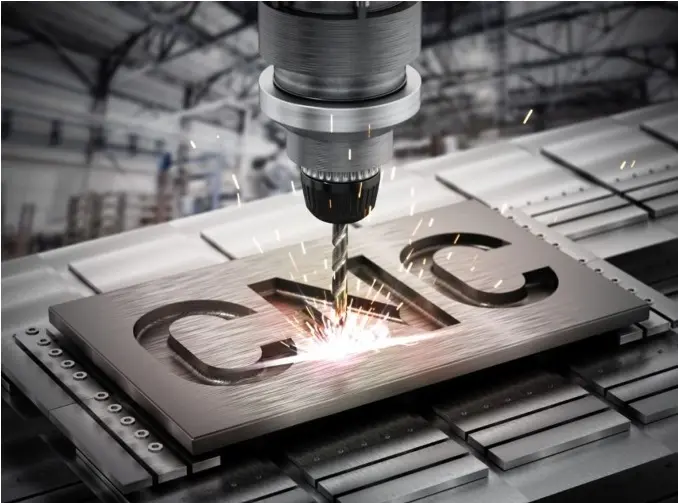

# Estructura del Conjunto de Datos Sintético

## **Descripción General**
- **Tipo de Conjunto de Datos**: Sintético, modelado a partir de una fresadora existente.
- **Tamaño del Conjunto de Datos**: 10,000 puntos de datos.
- **Estructura**: Cada fila representa un punto de datos con 14 características (columnas).

---

## **Características (Columnas)**

1. **UID (Identificador Único)**:
   - Rango: 1 a 10,000.
   - Descripción: Identificador único para cada punto de datos.

2. **Product ID (Identificador del Producto)**:
   - Formato: Letra (L, M, H) + Número de serie.
     - **L**: Calidad baja (50% de los productos).
     - **M**: Calidad media (30% de los productos).
     - **H**: Calidad alta (20% de los productos).
   - Descripción: Identifica la variante de calidad del producto y su número de serie.

3. **Type (Tipo de Producto)**:
   - Valores: L, M, H.
   - Descripción: Representa la calidad del producto (baja, media, alta).

4. **Air Temperature [K] (Temperatura del Aire)**:
   - Generación: Proceso de caminata aleatoria normalizado con una desviación estándar de 2 K alrededor de 300 K.
   - Descripción: Temperatura del aire en Kelvin.

5. **Process Temperature [K] (Temperatura del Proceso)**:
   - Generación: Proceso de caminata aleatoria normalizado con una desviación estándar de 1 K, sumado a la temperatura del aire más 10 K.
   - Descripción: Temperatura del proceso en Kelvin.

6. **Rotational Speed [rpm] (Velocidad de Rotación)**:
   - Cálculo: Derivada de una potencia de 2860 W, con ruido distribuido normalmente.
   - Descripción: Velocidad de rotación en revoluciones por minuto (rpm).

7. **Torque [Nm] (Par de Torsión)**:
   - Distribución: Valores distribuidos normalmente alrededor de 40 Nm con una desviación estándar de 10 Nm.
   - Restricción: No hay valores negativos.
   - Descripción: Par de torsión en Newton-metros (Nm).

8. **Tool Wear [min] (Desgaste de la Herramienta)**:
   - Cálculo: Depende de la calidad del producto:
     - **H**: Añade 5 minutos de desgaste.
     - **M**: Añade 3 minutos de desgaste.
     - **L**: Añade 2 minutos de desgaste.
   - Descripción: Tiempo de desgaste de la herramienta en minutos.

9. **Machine Failure (Falla de la Máquina)**:
   - Valores: 0 (sin falla) o 1 (falla).
   - Descripción: Etiqueta que indica si la máquina ha fallado en ese punto de datos debido a cualquiera de los modos de falla.

---

## **Modos de Falla Independientes**

1. **Tool Wear Failure (TWF - Falla por Desgaste de la Herramienta)**:
   - Condición: El desgaste de la herramienta alcanza un valor entre 200 y 240 minutos.
   - Acciones:
     - Reemplazo de la herramienta: 69 veces.
     - Falla de la herramienta: 51 veces.
   - Frecuencia: 120 veces en el conjunto de datos.

2. **Heat Dissipation Failure (HDF - Falla por Disipación de Calor)**:
   - Condición:
     - Diferencia entre la temperatura del aire y la temperatura del proceso < 8.6 K.
     - Velocidad de rotación < 1380 rpm.
   - Frecuencia: 115 veces en el conjunto de datos.

3. **Power Failure (PWF - Falla de Potencia)**:
   - Condición: La potencia (producto del par de torsión y la velocidad de rotación en rad/s) está fuera del rango [3500 W, 9000 W].
   - Frecuencia: 95 veces en el conjunto de datos.

4. **Overstrain Failure (OSF - Falla por Sobreesfuerzo)**:
   - Condición: El producto del desgaste de la herramienta y el par de torsión excede:
     - 11,000 minNm para productos de calidad **L**.
     - 12,000 minNm para productos de calidad **M**.
     - 13,000 minNm para productos de calidad **H**.
   - Frecuencia: 98 veces en el conjunto de datos.

5. **Random Failures (RNF - Fallas Aleatorias)**:
   - Condición: Cada proceso tiene un 0.1% de probabilidad de fallar independientemente de los parámetros.
   - Frecuencia: 5 veces en el conjunto de datos.

---

## **Notas Adicionales**
- **Etiqueta de Falla**: Si al menos uno de los modos de falla es verdadero, la etiqueta "machine failure" se establece en 1.
- **Transparencia**: No se indica explícitamente cuál de los modos de falla causó la falla, lo que dificulta la interpretación para los métodos de aprendizaje automático.

In [2]:
import pandas as pd
import numpy as np


Datasets elegido: https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020

In [3]:
df=pd.read_csv('./data/ai4i2020.csv',index_col=0)

In [18]:
df.head(20)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0


In [16]:
for i in range(1,10000):
    print(df.index[i],'  ',df.loc[i,'Machine failure'])

2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    1
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    1
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    1
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    0
98    0
99    0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
120    0
121    0
122    0
123    0
124    0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB
